In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [5]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [6]:
df=data.loc['0':'207']

In [7]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [8]:
X1 = df[['PM2.5y1','PM2.5y2','PM2.5y3','year', 'month', 'day']]
Y1 = df['PM2.5']

In [45]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=24)

In [46]:
grad_boost = GradientBoostingRegressor(n_estimators=2000,
                                      max_depth=7,
                                      max_features=0.1,
                                      min_samples_split=4,
                                      min_samples_leaf=5,
                                      learning_rate=0.001)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.001, max_depth=7, max_features=0.1,
                          min_samples_leaf=5, min_samples_split=4,
                          n_estimators=2000)

In [47]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.8186342229194442

Score on test data: 0.751151751444322

Root Mean Squared Error: 32.643112792418584

Overall model accuracy: 0.751151751444322


In [48]:
test=data.loc['207':'259']
X=test[['PM2.5y1','PM2.5y2','PM2.5y3','year', 'month', 'day']]
X

,PM2.5y1,PM2.5y2,PM2.5y3,year,month,day
207,302.818571,217.428571,106.245714,2019,12,29
208,316.292857,264.292857,32.319143,2020,1,5
209,241.932857,191.864286,95.229429,2020,1,12
210,253.915714,237.660000,216.040000,2020,1,19
211,128.998571,173.172857,134.044286,2020,1,26
212,187.365714,143.550000,138.318571,2020,2,2
213,146.527143,193.068571,160.888571,2020,2,9
214,193.267143,109.957143,97.521429,2020,2,16
215,110.288571,166.732857,99.651429,2020,2,23
216,108.875000,109.975714,89.537143,2020,3,1


In [49]:
predict=grad_boost.predict(X)

In [50]:
predict

array([159.18931706, 153.50417073, 148.66941663, 189.94167093,
       134.58479153, 117.48381964, 152.3374288 , 121.41274415,
       115.51268195,  90.55379773,  89.52972315,  92.84870643,
        89.81252331,  89.66561804,  81.24744236,  76.63582058,
       109.1776246 , 110.40024764,  71.71621908, 111.02367241,
        88.33022425,  84.66807223,  85.86988234,  64.27888567,
        75.96964816,  64.2800112 ,  57.53229534,  56.6366748 ,
        57.79427392,  54.3683289 ,  55.11829895,  56.07142791,
        55.58161541,  53.11879665,  54.67041796,  52.22004949,
        58.71010524,  56.03913949,  54.60921466,  57.606896  ,
        72.27828389,  79.75402263,  80.02516361, 130.76069326,
       126.90362687, 177.27583217, 198.96324154, 176.15533978,
       176.07848982, 203.13888851, 200.30939968, 177.29566441,
       207.23469357])

In [51]:
dates=data.loc['207':'259','From Date']

In [52]:
X['From Date']=dates.values

In [53]:
X.columns

Index(['PM2.5y1', 'PM2.5y2', 'PM2.5y3', 'year', 'month', 'day', 'From Date'], dtype='object')

In [54]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [55]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [56]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [57]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

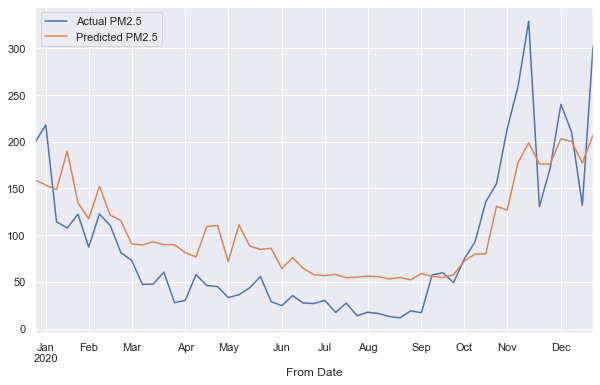

In [58]:
test['PM2.5'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM2.5')

In [59]:
np.sqrt(mean_squared_error(test['PM2.5'],X['pred']))

47.52188552785854

In [60]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 26.317675995831824
MSE: 1065.572812778562
RMSE: 32.643112792418584
R-Squared: 0.751151751444322


In [61]:
mae = metrics.mean_absolute_error(test['PM2.5'],X['pred'])
mse = metrics.mean_squared_error(test['PM2.5'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM2.5'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 40.45824964398159
MSE: 2258.329604122891
RMSE: 47.52188552785854
R-Squared: 0.6400982960215993


In [62]:
import pickle
filename = 'PM2.5_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [63]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.751151751444322


# 3rd plot

In [64]:
testcase = pd.DataFrame()

In [65]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [66]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [67]:
testcase

,test,pred,Corrected
152,234.834286,194.454937,227.098050
14,93.437143,107.832444,75.189332
207,199.317143,159.189317,191.832430
189,44.624286,54.600037,21.956924
112,109.975714,89.020102,121.663215
121,72.604286,122.649747,90.006634
54,216.040000,169.535897,202.179010
159,128.998571,188.040921,155.397808
26,40.867143,68.245409,35.602296
122,118.565714,141.313892,108.670779


In [68]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [69]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.9103709343496541

In [70]:
test2020=pd.DataFrame()

In [71]:
test2020['test']=test['PM2.5']
test2020['pred']=X['pred']

In [72]:
test2020.index=test.index

In [73]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

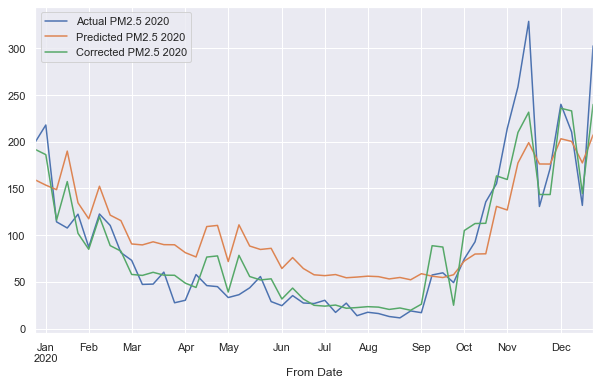

In [74]:
test2020['test'].plot(legend=True, label='Actual PM2.5 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM2.5 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM2.5 2020')

In [75]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.8380603766288697